In [314]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder


In [315]:
df = data = pd.read_csv("CleanData/2017/data.csv")
df.sample(5)

,codgeo,Libellé de la commune,rsa,Nom Gagnant,Prénom Gagnant,Code du département,Libellé du département,Code de la commune,Prenom,Nom,Tendance,Code Tendance,Parti polititque,Nombre de ménages fiscaux,Nombre de personnes dans les ménages fiscaux,Niveau de vie,Nombre de personnes actives de 15 à 64 ans,Nombre de chômeurs de 15 à 64 ans,Nombre d'employés actifs de 15 à 64 ans
9410,56046,Crach,40.0,FILLON,François,56,Morbihan,46,François,FILLON,droite,4,LR,1532.0,3415.0,23210.0,1367.110851,170.912791,351.451024
9605,57022,Angevillers,14.0,MACRON,Emmanuel,57,Moselle,22,Emmanuel,MACRON,gauche,3,LREM,487.0,1142.0,24430.0,593.000000,63.000000,255.000000
1119,12169,Naucelle,16.0,MACRON,Emmanuel,12,Aveyron,169,Emmanuel,MACRON,gauche,3,LREM,931.0,1974.0,20480.0,769.000000,61.000000,235.000000
10455,60074,Blaincourt-lès-Précy,8.0,LE PEN,Marine,60,Oise,74,Marine,LE PEN,d'extrême droite,1,RN,460.0,1220.0,26780.0,578.430380,53.223629,155.654008
11131,62686,Ramecourt,7.0,LE PEN,Marine,62,Pas-de-Calais,686,Marine,LE PEN,d'extrême droite,1,RN,133.0,364.0,19410.0,179.716766,21.192802,51.758858


In [316]:

loire = df.loc[df['Code du département'] == '44']

loire.to_csv("./CleanData/loire.csv");

df = data.drop(data[data['Code du département'] == '44'].index)

df = df.drop([
'codgeo',
'Libellé de la commune',
'Nom Gagnant',
'Prénom Gagnant',
'Code du département',
'Libellé du département',
'Code de la commune',
'Prenom','Nom',
'Code Tendance',
'Parti polititque'], axis=1)

print(df.Tendance.unique())


["d'extrême droite" "d'extrême gauche" 'gauche' 'droite']


In [317]:
dummy = pd.get_dummies (df ['Tendance'])
df = pd.concat( [df, dummy ], axis = 1)
df = df.drop( ['Tendance'], axis = 1)

display(df)


,rsa,Nombre de ménages fiscaux,Nombre de personnes dans les ménages fiscaux,Niveau de vie,Nombre de personnes actives de 15 à 64 ans,Nombre de chômeurs de 15 à 64 ans,Nombre d'employés actifs de 15 à 64 ans,d'extrême droite,d'extrême gauche,droite,gauche
0,7.0,122.0,248.0,17420.0,102.439655,10.043103,20.086207,True,False,False,False
1,7.0,122.0,248.0,17420.0,102.439655,10.043103,20.086207,False,True,False,False
2,18.0,928.0,2359.0,21400.0,1050.038800,105.374090,301.098518,True,False,False,False
3,18.0,928.0,2359.0,21400.0,1050.038800,105.374090,301.098518,True,False,False,False
4,18.0,455.0,921.0,19330.0,382.000000,50.000000,80.000000,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
15632,13.0,488.0,1318.0,24620.0,560.320717,41.209827,159.521912,True,False,False,False
15633,9.0,206.0,514.0,25630.0,258.714698,23.587935,77.006582,False,False,True,False
15634,6.0,329.0,820.0,30040.0,410.001547,34.853796,89.630528,False,False,True,False
15635,49.0,286.0,595.0,16500.0,338.948746,85.519376,104.291922,False,False,True,False


## Visualisation

<Axes: title={'center': 'Correlation matrix heatmap'}>

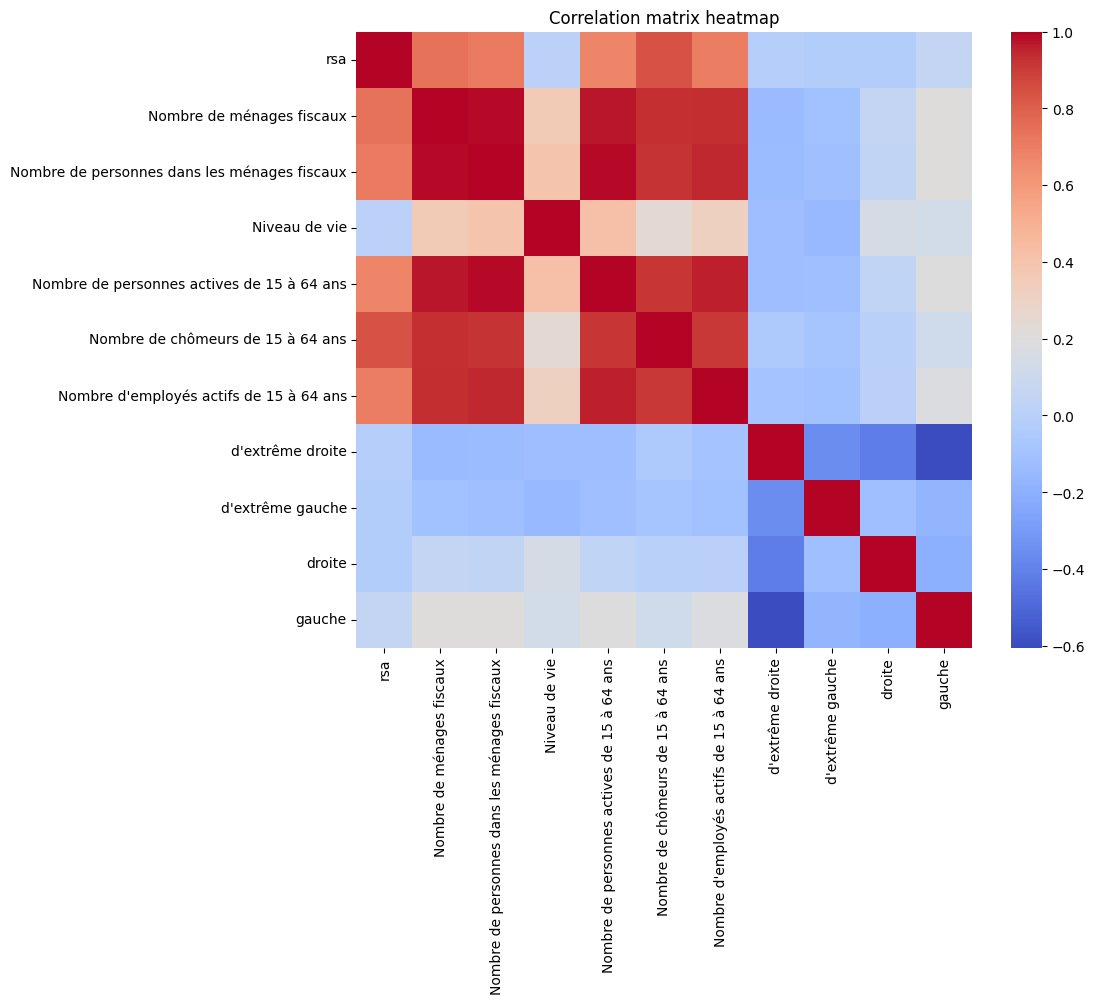

In [318]:
import seaborn as sns
fig, ax = plt.subplots(figsize = (10, 8))
plt.title('Correlation matrix heatmap')
correlation = df.corr()
sns.heatmap(
data = correlation,
square = True,
cmap = 'coolwarm',
ax = ax
)

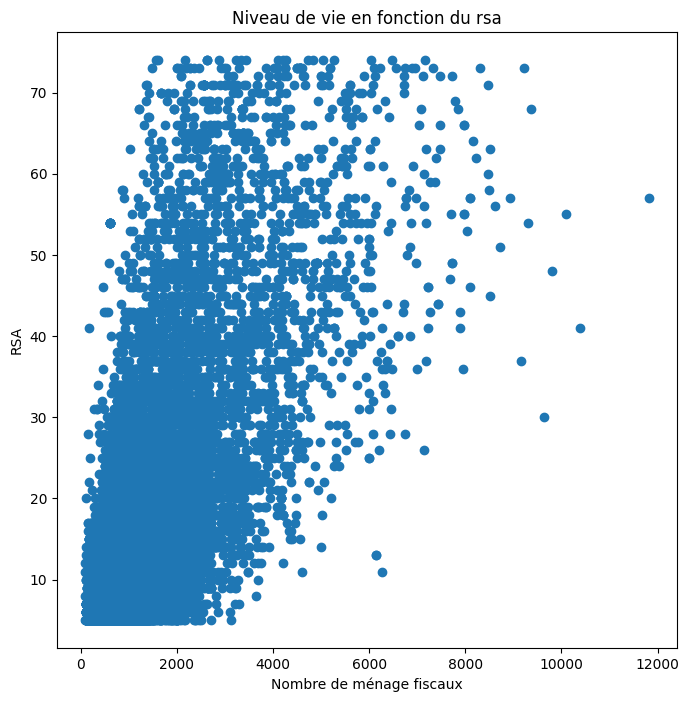

In [319]:
plt.figure(figsize = (8, 8))
plt.title("Niveau de vie en fonction du rsa")
plt.xlabel('Nombre de ménage fiscaux')
plt.ylabel('RSA')
plt.scatter(df["Nombre de personnes dans les ménages fiscaux"], df["rsa"])

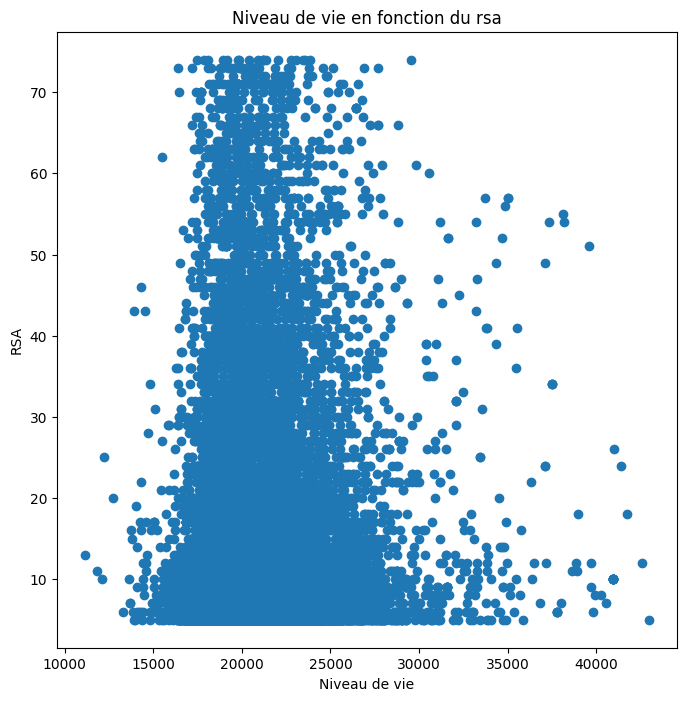

In [320]:
plt.figure(figsize = (8, 8))
plt.title("Niveau de vie en fonction du rsa")
plt.xlabel('Niveau de vie')
plt.ylabel('RSA')
plt.scatter(df["Niveau de vie"], df["rsa"])

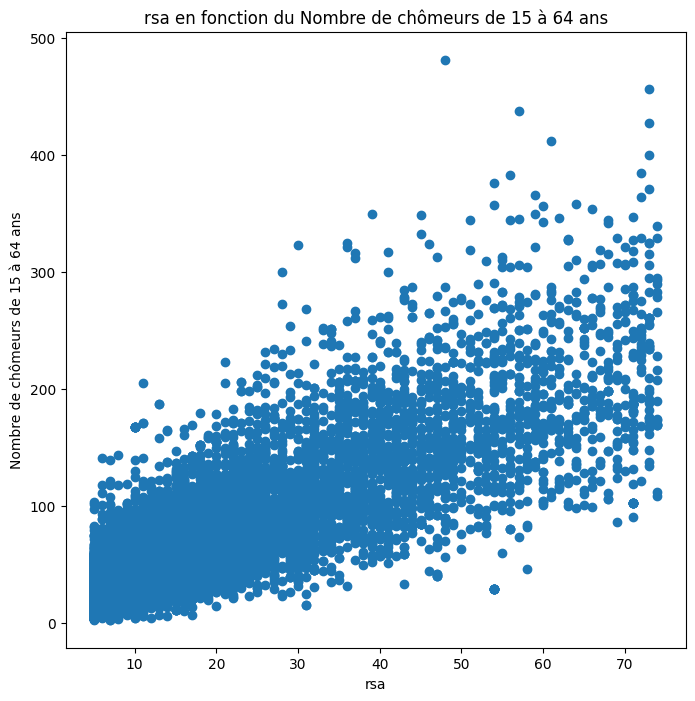

In [321]:
plt.figure(figsize = (8, 8))
plt.title("rsa en fonction du Nombre de chômeurs de 15 à 64 ans")
plt.xlabel('rsa')
plt.ylabel('Nombre de chômeurs de 15 à 64 ans')
plt.scatter(df["rsa"], df["Nombre de chômeurs de 15 à 64 ans"])

In [322]:
from sklearn.model_selection import train_test_split

X = df.drop(["d'extrême droite", "d'extrême gauche", "gauche", "droite"], axis=1)
Y = df[["d'extrême droite", "d'extrême gauche", "gauche", "droite"]]


x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Convertir Y en un tableau 1D
y_train = y_train.idxmax(axis=1)
y_test = y_test.idxmax(axis=1)

display(x_test)
display(y_train)
display(y_test)

,rsa,Nombre de ménages fiscaux,Nombre de personnes dans les ménages fiscaux,Niveau de vie,Nombre de personnes actives de 15 à 64 ans,Nombre de chômeurs de 15 à 64 ans,Nombre d'employés actifs de 15 à 64 ans
2524,43.0,661.0,1370.0,19420.0,618.040916,100.825610,259.581239
6036,56.0,1404.0,3298.0,21070.0,1361.495348,164.949505,464.061186
6377,7.0,389.0,942.0,21780.0,428.700515,38.022828,177.101928
6976,12.0,990.0,2618.0,26240.0,1249.997480,105.227738,250.776385
13514,7.0,370.0,1046.0,21730.0,508.701148,45.866963,137.782424
...,...,...,...,...,...,...,...
11438,5.0,354.0,888.0,23680.0,448.560336,26.214205,131.046837
11591,9.0,423.0,1138.0,21340.0,582.417324,45.723422,159.037988
5075,16.0,380.0,974.0,21300.0,467.000000,55.000000,145.000000
3982,5.0,128.0,268.0,21740.0,132.114286,8.257143,25.803571


15210    d'extrême droite
14659              droite
9312     d'extrême droite
3275     d'extrême gauche
2669     d'extrême droite
               ...       
5200     d'extrême droite
13586              droite
5401     d'extrême droite
865      d'extrême droite
7284     d'extrême droite
Length: 12375, dtype: object

2524     d'extrême droite
6036     d'extrême droite
6377               gauche
6976     d'extrême droite
13514    d'extrême droite
               ...       
11438    d'extrême gauche
11591              gauche
5075     d'extrême droite
3982               droite
3440     d'extrême droite
Length: 3094, dtype: object

In [323]:
feature_names = df.drop(["d'extrême droite", "d'extrême gauche", "droite", "gauche"], axis=1).columns.tolist()
feature_names

['rsa',
 'Nombre de ménages fiscaux',
 'Nombre de personnes dans les ménages fiscaux',
 'Niveau de vie',
 'Nombre de personnes actives de 15 à 64 ans',
 'Nombre de chômeurs de 15 à 64 ans',
 "Nombre d'employés actifs de 15 à 64 ans"]

In [324]:
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier


tree_dc = DecisionTreeClassifier(max_depth=5, random_state=42);
tree_dc.fit(x_train, y_train);

y_pred = tree_dc.predict(x_test);
print(accuracy_score(y_test, y_pred))

0.5785391079508727


In [325]:
from sklearn.ensemble import RandomForestClassifier


rd_clf = RandomForestClassifier(n_estimators=500, n_jobs=-1, max_depth=2, random_state=42)
rd_clf.fit(x_train, y_train);

In [326]:
print("Ordre d'importance des features")
for name, score in zip(feature_names, rd_clf.feature_importances_):
    print('%s: %i%%' %(name, int(score*100)))

Ordre d'importance des features
rsa: 2%
Nombre de ménages fiscaux: 19%
Nombre de personnes dans les ménages fiscaux: 18%
Niveau de vie: 31%
Nombre de personnes actives de 15 à 64 ans: 13%
Nombre de chômeurs de 15 à 64 ans: 2%
Nombre d'employés actifs de 15 à 64 ans: 11%


In [327]:

from sklearn.ensemble import AdaBoostClassifier


ada_clf = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=2), n_estimators=500, learning_rate=0.2, random_state=42)

ada_clf.fit(x_train, y_train)

y_pred_ada = ada_clf.predict(x_test)
print('score Adaboost :' , accuracy_score(y_test, y_pred_ada))

score Adaboost : 0.590174531351002


In [330]:

x_new = pd.read_csv("./CleanData/loire.csv")

tendances = x_new['Tendance']

x_new = x_new.drop([
'codgeo',
'Libellé de la commune',
'Nom Gagnant',
'Prénom Gagnant',
'Code du département',
'Libellé du département',
'Code de la commune',
'Prenom','Nom',
'Code Tendance',
'Tendance',
'Parti polititque'], axis=1)

display(x_new)

# Effectuer des prédictions sur les nouvelles données
predictions = ada_clf.predict(x_new)

tests = pd.concat([x_new, pd.Series(predictions)], axis=1)
tests = pd.concat([tests, tendances], axis=1)

# Afficher les prédictions
display(tests)

,rsa,Nombre de ménages fiscaux,Nombre de personnes dans les ménages fiscaux,Niveau de vie,Nombre de personnes actives de 15 à 64 ans,Nombre de chômeurs de 15 à 64 ans,Nombre d'employés actifs de 15 à 64 ans
131,5.0,297.0,806.0,20400.0,411.493235,27.965560,104.870849
139,8.0,170.0,443.0,22040.0,205.886036,28.685316,52.013273
147,7.0,301.0,781.0,19020.0,354.000000,40.000000,105.000000
155,28.0,603.0,1522.0,25590.0,813.947290,75.613626,210.037850
163,10.0,432.0,1049.0,19890.0,524.016477,43.637516,94.217364
...,...,...,...,...,...,...,...
7929,6.0,532.0,1550.0,21640.0,818.223478,52.270123,206.064906
7930,6.0,471.0,1251.0,21380.0,602.197484,54.676417,136.705191
7932,33.0,1371.0,3342.0,25670.0,1597.000000,98.000000,400.000000
7934,13.0,1339.0,3583.0,22220.0,1835.000000,146.000000,490.000000


,rsa,Nombre de ménages fiscaux,Nombre de personnes dans les ménages fiscaux,Niveau de vie,Nombre de personnes actives de 15 à 64 ans,Nombre de chômeurs de 15 à 64 ans,Nombre d'employés actifs de 15 à 64 ans,0,Tendance
131,5.0,297.0,806.0,20400.0,411.493235,27.965560,104.870849,gauche,droite
139,8.0,170.0,443.0,22040.0,205.886036,28.685316,52.013273,gauche,droite
147,7.0,301.0,781.0,19020.0,354.000000,40.000000,105.000000,d'extrême droite,droite
155,28.0,603.0,1522.0,25590.0,813.947290,75.613626,210.037850,d'extrême droite,droite
163,10.0,432.0,1049.0,19890.0,524.016477,43.637516,94.217364,d'extrême droite,droite
...,...,...,...,...,...,...,...,...,...
162,NaN,NaN,NaN,NaN,NaN,NaN,NaN,d'extrême droite,NaN
164,NaN,NaN,NaN,NaN,NaN,NaN,NaN,d'extrême droite,NaN
165,NaN,NaN,NaN,NaN,NaN,NaN,NaN,gauche,NaN
166,NaN,NaN,NaN,NaN,NaN,NaN,NaN,gauche,NaN
